In [46]:
import pandas as pd 
import matplotlib.pyplot as plt

In [32]:
train = pd.read_csv("../datasets/train.csv")
test = pd.read_csv("../datasets/test.csv")
genders = pd.read_csv("../datasets/gender_submission.csv")

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
train.shape

(891, 12)

In [37]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:ylabel='Survived'>

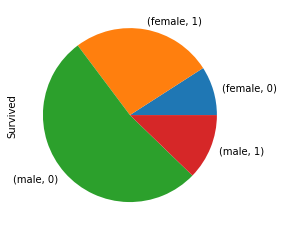

In [68]:
survivors = train.groupby(['Sex', 'Survived'])['Survived'].count()
survivors.plot.pie()

In [13]:
selection = train.columns.drop('Survived')
X_train = train[selection]
y_train = train['Survived']

In [14]:
print(X_train.head())
print('************')
print(y_train.head())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  
************
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [15]:
X_train.shape

(891, 11)

In [16]:
married = X_train['Name'].str.contains('Mr.' and 'Mrs.')
X_train.insert(len(X_train.columns), 'Married', married)

In [17]:
married.shape[0]

891

In [18]:
X_train = X_train.replace({'Sex':{'male':1, 'female':0}})
X_train = X_train.replace({'Married':{True:1, False:0}})

X_train = X_train.drop(columns=['Name'])
X_train = X_train.drop(columns=['Ticket'])
X_train = X_train.drop(columns=['Cabin'])

X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Married
0,1,3,1,22.0,1,0,7.2500,S,0
1,2,1,0,38.0,1,0,71.2833,C,1
2,3,3,0,26.0,0,0,7.9250,S,0
3,4,1,0,35.0,1,0,53.1000,S,1
4,5,3,1,35.0,0,0,8.0500,S,0
